In [23]:
from kervis.utils import Model
from kervis.utils import Dataset
from kervis.kernels import VertexHistogram, EdgeHistogram, ShortestPath, Graphlet, WeisfeilerLehman

In [24]:
example = Dataset("example",cmap="Set3", from_TUDataset=False)
example.data = example.data + example.data
example.graphs = example.graphs + example.graphs
example.y = [y for i in range(len(example.y)) for y in example.y]

In [25]:
SP = ShortestPath()
SP_example = Model(SP, example, "SVM", test_size=0.5)
SP_example.explain("permutation")

In [26]:
SP_example.kernel.X

array([[6., 0., 2., 5., 5., 3., 1.],
       [4., 1., 4., 6., 3., 2., 4.],
       [6., 0., 2., 5., 5., 3., 1.],
       [4., 1., 4., 6., 3., 2., 4.]])

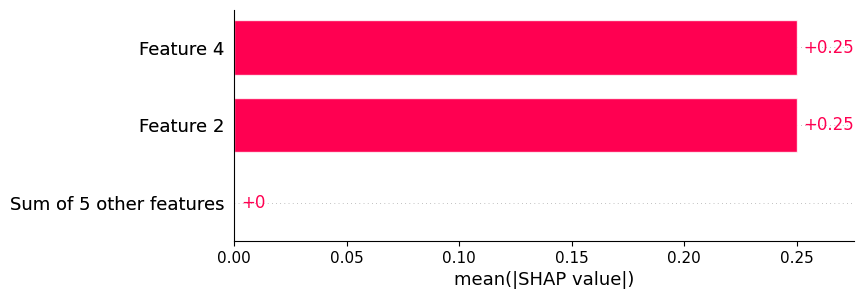

In [27]:
SP_example.bar_plot(max_display=3)

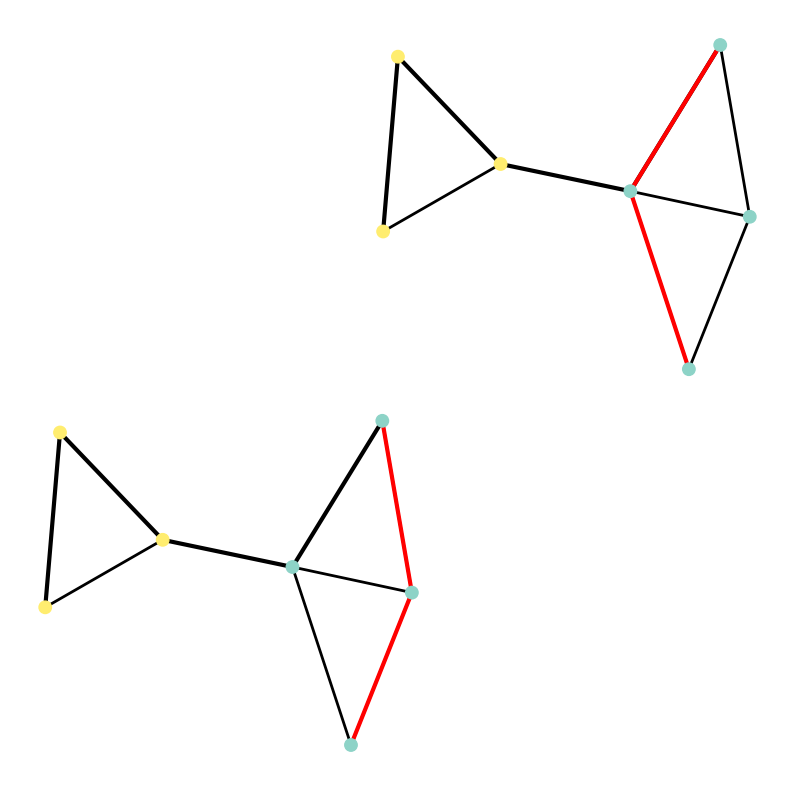

In [29]:
SP_example.highlight_features(0,2)